In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#For inline plotting 
%matplotlib inline                 
%config InlineBackend.figure_format = 'svg'

plt.style.use("seaborn-v0_8-dark") 


In [2]:
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv

--2024-05-11 18:16:23--  https://lazyprogrammer.me/course_files/SPY.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251935 (246K) [text/csv]
Saving to: 'SPY.csv'

SPY.csv             100%[===================>] 246.03K  1.19MB/s    in 0.2s    

2024-05-11 18:16:25 (1.19 MB/s) - 'SPY.csv' saved [251935/251935]



In [3]:
df = pd.read_csv('SPY.csv', index_col=0, parse_dates = True)

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [5]:
# Log returns 

df['LogRet'] = np.log(df['Close']).diff()

df.head()

,Open,High,Low,Close,Adj Close,Volume,LogRet
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,NaN
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,0.002644
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,0.000704
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,0.004212
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,0.003322


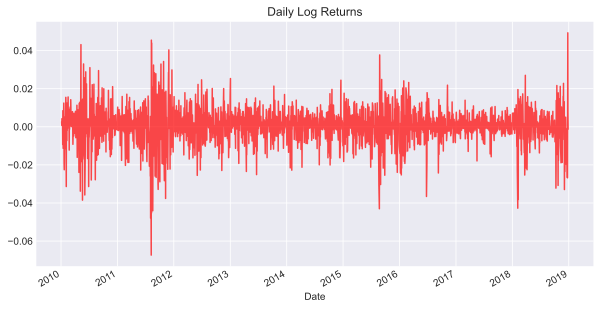

In [8]:
df2  = df.iloc[1:].copy() 

fig, axes = plt.subplots(figsize = (10,5))

df2['LogRet'].plot(ax = axes, color = 'red', alpha = 0.7)

axes.set_title('Daily Log Returns')

axes.grid()

Volatility clustering is visible, large log returns/ fluctuations are clustered together!

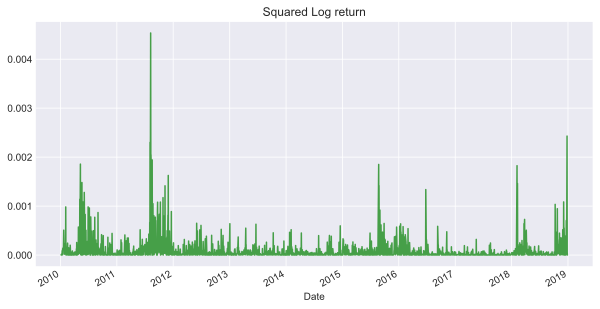

In [10]:
# Square of the log returns 

df2['Ysq'] = df2['LogRet'] ** 2

fig, axes = plt.subplots(figsize = (10,5))

df2['Ysq'].plot(ax = axes, color = 'green', alpha = 0.7)

axes.set_title('Squared Log return')

axes.grid()

Squaring the log returns makes it more visible to notice volatility clustering!

### ACF AND PACF
-------

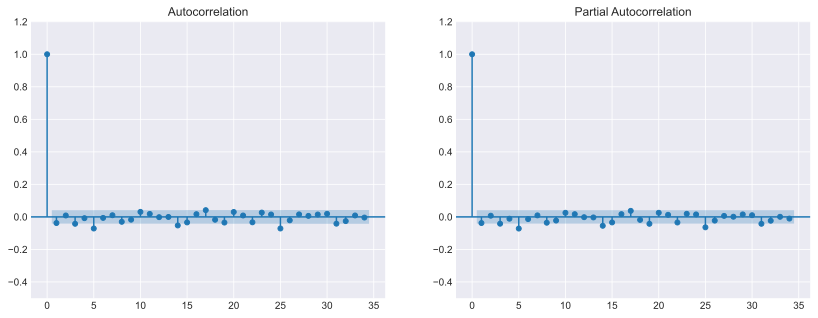

In [14]:
fig, axes = plt.subplots(1,2, figsize = (14,5))

plot_acf(df2['LogRet'], ax = axes[0]);
plot_pacf(df2['LogRet'], ax = axes[1]);

for i in range(2):

    axes[i].grid()
    axes[i].set_ylim(-0.5, 1.2)

Beyond lag 0 there are no significant correlations. Therefore differenced log returns act like iid gaussian noise or white noise.

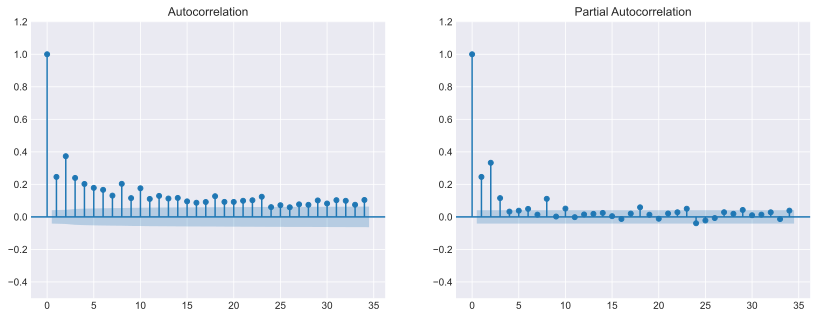

In [15]:
fig, axes = plt.subplots(1,2, figsize = (14,5))

plot_acf(df2['Ysq'], ax = axes[0]);
plot_pacf(df2['Ysq'], ax = axes[1]);

for i in range(2):

    axes[i].grid()
    axes[i].set_ylim(-0.5, 1.2)

Squaring the log returns, correlations between different lags are much more visible! 

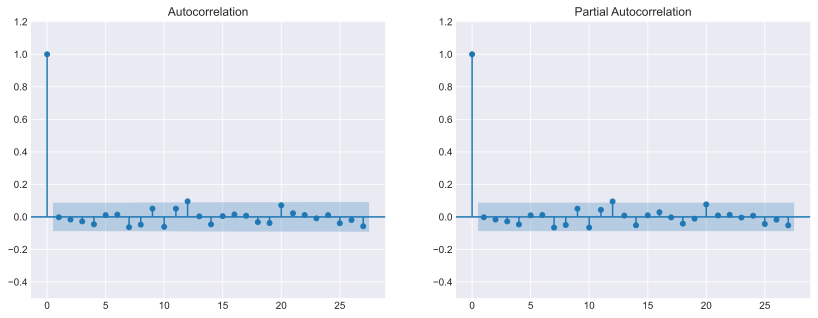

In [16]:
# compare the correlations above with that of an iid random noise 

noise_sq = np.random.randn(500)**2

fig, axes = plt.subplots(1,2, figsize = (14,5))

plot_acf(noise_sq, ax = axes[0]);
plot_pacf(noise_sq, ax = axes[1]);

for i in range(2):

    axes[i].grid()
    axes[i].set_ylim(-0.5, 1.2)


These results tells us that stock returns are not exactly like gaussian white noise used to produce random walk. This is clear from the plots above, where no matter how one transforms the gaussian iid noise one gets an acf and pacf plots expected from a random noise!

### ARCH(1)
-------

In [22]:
# Train - test split 

N_test = 500 
train, test = df2.iloc[:-N_test][['LogRet']].copy(), df2[-N_test:][['LogRet']].copy()

In [24]:
# Importance of scaling using GARCH

model = arch_model(train['LogRet'], vol = 'GARCH', p = 1, q = 1)

model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 41389781493351.97
Iteration:      2,   Func. Count:     19,   Neg. LLF: 156275213440365.47
Iteration:      3,   Func. Count:     34,   Neg. LLF: 4210452783.137622
Iteration:      4,   Func. Count:     46,   Neg. LLF: -5876.700895326612
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5876.7008974483315
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 4


/opt/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.532e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 LogRet   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5876.70
Distribution:                  Normal   AIC:                          -11745.4
Method:            Maximum Likelihood   BIC:                          -11723.5
                                        No. Observations:                 1762
Date:                Sat, May 11 2024   Df Residuals:                     1761
Time:                        19:05:15   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         6.1073e-04  1.947e-04      3.137  1.708e-03 [2.

In [25]:
# Standardize using the training mean and std of the training set 

mu = train['LogRet'].mean()
std = train['LogRet'].std()

train['scaled'], test['scaled'] = (train['LogRet']-mu)/std, (test['LogRet']-mu)/std

df2['scaled'] = (df2['LogRet']-mu)/std

In [26]:
# arch(1)

arch1 = arch_model(train['scaled'], vol = 'ARCH', p = 1)

res_arch1 = arch1.fit(update_freq = 10) # update_freq that prints the loss at each iteration

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2457.984028831116
            Iterations: 6
            Function evaluations: 32
            Gradient evaluations: 6


In [27]:
res_arch1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                 scaled   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2457.98
Distribution:                  Normal   AIC:                           4921.97
Method:            Maximum Likelihood   BIC:                           4938.39
                                        No. Observations:                 1762
Date:                Sat, May 11 2024   Df Residuals:                     1761
Time:                        19:18:01   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0127  2.325e-02      0.545      0.586 [-3.291e-02,5.825e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.8188  6.722e-02     12.181  3.936e-34   [  0.687,  0.951]
alpha[1]       0.1771  4.774e-02      3.709  2.079e-04 [8.350e-02,  0.271]
==========================================================================

Covariance estimator: robust
"""

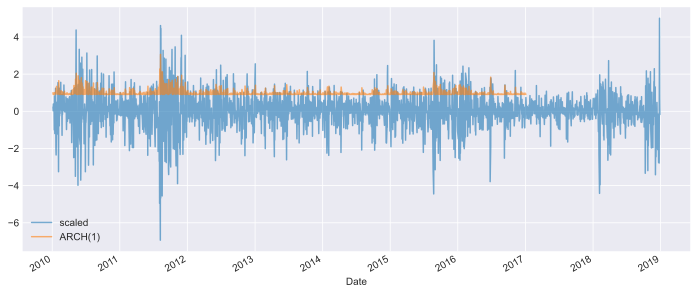

In [28]:
# plot in sample conditional volatility predictions 

df2['ARCH(1)'] = res_arch1.conditional_volatility 

fig, axes = plt.subplots(figsize = (12,5))

cols = ['scaled', 'ARCH(1)']

df2[cols].plot(ax = axes, alpha = 0.6)

axes.grid()

In [30]:
# how to forecast 

fcast_arch1 = res_arch1.forecast(horizon = N_test, reindex = True)

In [31]:
fcast_arch1

In [32]:
fcast_arch1.mean # since we did not specify the start =  , argument in the .forecast() method it assumes we want to start from the end of the training set

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
fcast_arch1.variance 

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
fcast_arch1.residual_variance # when we use a constant mean or zero mean (default val is constant) when we specify the model 

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# call the forecast function again with reindex = False 

fcast_arch1 = res_arch1.forecast(horizon = N_test, reindex = False) 

In [36]:
fcast_arch1.mean

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,...,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671


In [37]:
fcast_arch1.variance

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.912612,0.98042,0.992427,0.994553,0.994929,0.994996,0.995008,0.99501,0.99501,0.99501,...,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501


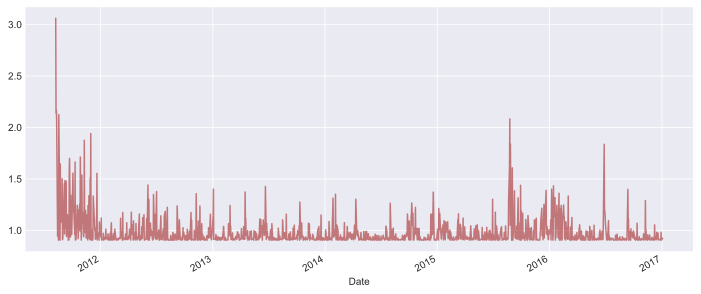

In [40]:
# plot conditional volatility 

fig, axes = plt.subplots(figsize = (12,5))

df2.loc['2011-08-09':]['ARCH(1)'].plot(ax = axes, alpha = 0.6, color = 'brown')

axes.grid()

In [41]:
# we picked above an in sample date where the prediction for the conditional volatility is high 


fcast_arch1 = res_arch1.forecast(horizon = N_test, reindex = True, start = '2011-08-09')

In [42]:
fcast_arch1.variance['2011-07-28':'2011-08-05'] # any date before the date we set above is a NaN forecast 

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2011-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df2.index.get_loc('2011-08-09')

402

In [45]:
df2.index[402+500]

Timestamp('2013-08-06 00:00:00')

In [58]:
# store the forecasts from the date we set onwards 

df2.loc['2011-08-10':'2013-08-06', 'ARCH(1)Fcast'] = np.sqrt(fcast_arch1.variance.loc['2011-08-09'].to_numpy())

In [47]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume,LogRet,Ysq,scaled,ARCH(1),ARCH(1)Fcast
Date,,,,,,,,,,,
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,0.002644,6.988615e-06,0.230781,0.996241,NaN
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,0.000704,4.953455e-07,0.032152,0.909534,NaN
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,0.004212,1.774439e-05,0.391423,0.904929,NaN
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,0.003322,1.103727e-05,0.300272,0.918819,NaN
2010-01-11,115.080002,115.129997,114.239998,114.730003,93.385582,106375700,0.001396,1.947654e-06,0.102988,0.912948,NaN


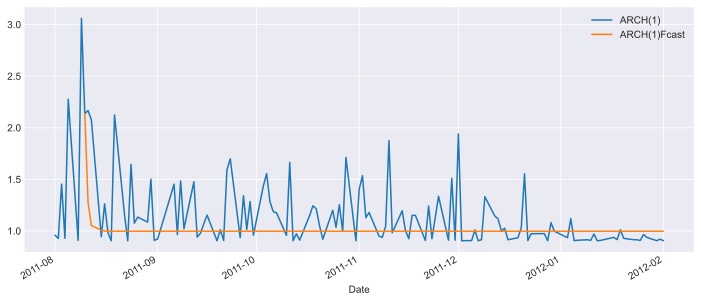

In [49]:
fig, axes = plt.subplots(figsize = (12,5))

df2.loc['2011-08-01':'2012-02-01'][['ARCH(1)', 'ARCH(1)Fcast']].plot(ax = axes)

axes.grid()

In [50]:
fcast_arch1.variance.index.get_loc('2011-08-17')

408

In [51]:
df2.index[408+500]

Timestamp('2013-08-14 00:00:00')

In [57]:
# store the forecasts from the date we set onwards 

df2.loc['2011-08-18':'2013-08-14', 'ARCH(1)Fcastlow'] = np.sqrt(fcast_arch1.variance.loc['2011-08-17'].to_numpy())

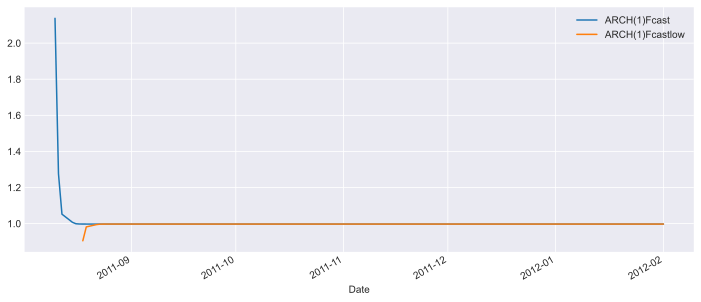

In [59]:
fig, axes = plt.subplots(figsize = (12,5))

cols = ['ARCH(1)Fcast', 'ARCH(1)Fcastlow']
df2.loc['2011-08-01':'2012-02-01'][cols].plot(ax = axes)

axes.grid()

No matter what the starting volatility is both forecasts end up converging to the same value. In the following we will prove that this value is the theoretical unconditional variance!

In [60]:
# theoretical unconditional variance 

res_arch1.params

mu          0.012671
omega       0.818829
alpha[1]    0.177065
Name: params, dtype: float64

In [65]:
# recall that sigma ** 2 (unconditional variance) = w / (1 - alpha[1]) 

sigma = res_arch1.params['omega']/ (1 - res_arch1.params['alpha[1]'])

# check if sigma is the same as the last value (asymptotic value of the forecasts above)

fcast_arch1.variance.loc['2011-08-17'].to_numpy()[-1], fcast_arch1.variance.loc['2011-08-09'].to_numpy()[-1], sigma


(0.9950100665989873, 0.9950100665989873, 0.9950100665989872)

Notice that they are essentially the same!

### GARCH(1,1)
------

The most popular Garch due to the fact that it fits financial time-series quite well.

In [66]:
garch11 = arch_model(train['scaled'], vol = 'GARCH', p = 1, q = 1)

res_garch11 = garch11.fit(update_freq = 10)

Iteration:     10,   Func. Count:     62,   Neg. LLF: 2269.1079520033186
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2269.107941826107
            Iterations: 12
            Function evaluations: 71
            Gradient evaluations: 12


In [67]:
res_garch11.summary() # AIC and Log likelihood is much better than ARCH(1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 scaled   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2269.11
Distribution:                  Normal   AIC:                           4546.22
Method:            Maximum Likelihood   BIC:                           4568.11
                                        No. Observations:                 1762
Date:                Sat, May 11 2024   Df Residuals:                     1761
Time:                        20:56:06   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0287  1.865e-02      1.538      0.124 [-7.863e-03,6.525e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0469  1.060e-02      4.427  9.560e-06 [2.615e-02,6.770e-02]
alpha[1]       0.1499  2.499e-02      6.000  1.972e-09     [  0.101,  0.199]
beta[1]        0.8021  2.545e-02     31.516 5.231e-218     [  0.752,  0.852]
============================================================================

Covariance estimator: robust
"""

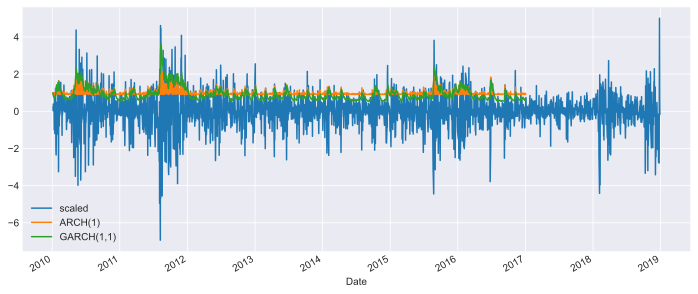

In [68]:
# store the conditional volatility 

df2['GARCH(1,1)'] = res_garch11.conditional_volatility

fig, axes = plt.subplots(figsize = (12,5))

cols = ['scaled', 'ARCH(1)', 'GARCH(1,1)']

df2[cols].plot(ax = axes)

axes.grid()

In [69]:
fcast_garch11 = res_garch11.forecast(horizon = N_test, reindex = True, start = '2011-08-09')

In [70]:
# store the forecasts from the date we set onwards 

df2.loc['2011-08-10':'2013-08-06', 'GARCH(1,1)Fcast'] = np.sqrt(fcast_garch11.variance.loc['2011-08-09'].to_numpy())

In [71]:
df2['AbScaled'] = df2['scaled'].abs() 

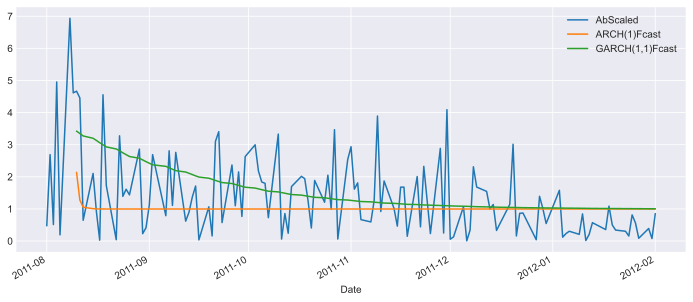

In [73]:
cols = ['AbScaled', 'ARCH(1)Fcast', 'GARCH(1,1)Fcast']

fig, axes = plt.subplots(figsize = (12,5))

df2.loc['2011-08-01':'2012-02-01'][cols].plot(ax = axes)

axes.grid()

ARCH(1) converges much faster than GARCH(1,1) implying the latter is more persistent. 

### GARCH(1,1) with t-distribution
-------

In [74]:
garch11t = arch_model(train['scaled'], vol = 'GARCH', p = 1, q = 1, dist = 'StudentsT')

res_garch11t = garch11t.fit(update_freq = 10)


Iteration:     10,   Func. Count:     74,   Neg. LLF: 2230.182989541494
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2230.179786587259
            Iterations: 14
            Function evaluations: 97
            Gradient evaluations: 14


In [75]:
res_garch11t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       scaled   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2230.18
Distribution:      Standardized Student's t   AIC:                           4470.36
Method:                  Maximum Likelihood   BIC:                           4497.73
                                              No. Observations:                 1762
Date:                      Sat, May 11 2024   Df Residuals:                     1761
Time:                              21:19:01   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0471  1.691e-02      2.788  5.309e-03 [1.400e-02,8.028e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0399  9.295e-03      4.296  1.742e-05 [2.171e-02,5.815e-02]
alpha[1]       0.1615  2.507e-02      6.442  1.180e-10     [  0.112,  0.211]
beta[1]        0.8081  2.353e-02     34.350 1.429e-258     [  0.762,  0.854]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             5.5803      0.733      7.610  2.738e-14 [  4.143,  7.018]
========================================================================

Covariance estimator: robust
"""

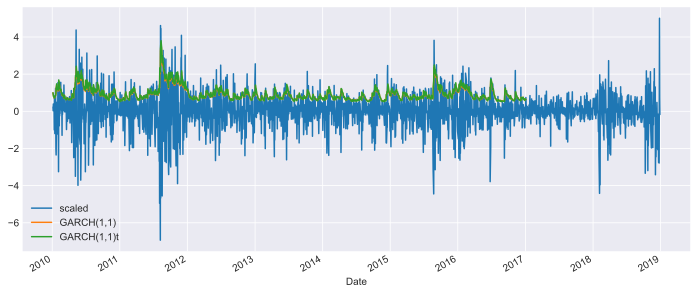

In [76]:
# store the conditional volatility 

df2['GARCH(1,1)t'] = res_garch11t.conditional_volatility

fig, axes = plt.subplots(figsize = (12,5))

cols = ['scaled', 'GARCH(1,1)', 'GARCH(1,1)t']

df2[cols].plot(ax = axes)

axes.grid()

In [77]:
fcast_garch11t = res_garch11t.forecast(horizon = N_test, reindex = True, start = '2011-08-09')

In [78]:
# store the forecasts from the date we set onwards 

df2.loc['2011-08-10':'2013-08-06', 'GARCH(1,1)tFcast'] = np.sqrt(fcast_garch11t.variance.loc['2011-08-09'].to_numpy())

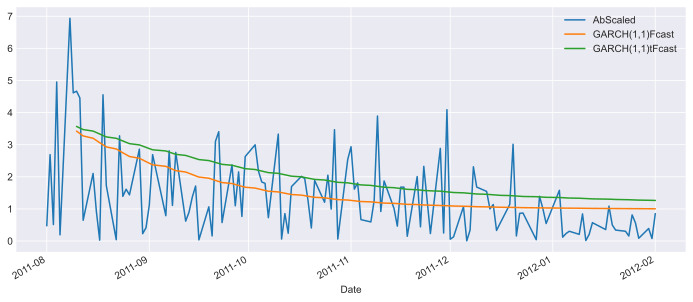

In [79]:
cols = ['AbScaled', 'GARCH(1,1)Fcast', 'GARCH(1,1)tFcast']

fig, axes = plt.subplots(figsize = (12,5))

df2.loc['2011-08-01':'2012-02-01'][cols].plot(ax = axes)

axes.grid()

### GARCH(p,q)
-----

In [80]:
garchpq = arch_model(train['scaled'], vol = 'GARCH', p = 8, q = 5, dist = 'StudentsT')

res_garchpq = garchpq.fit(update_freq = 10)

Iteration:     10,   Func. Count:    186,   Neg. LLF: 2612.1093223582075
Iteration:     20,   Func. Count:    369,   Neg. LLF: 2224.515459585651
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2224.2181169557466
            Iterations: 29
            Function evaluations: 522
            Gradient evaluations: 29


In [81]:
res_garchpq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       scaled   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2224.22
Distribution:      Standardized Student's t   AIC:                           4480.44
Method:                  Maximum Likelihood   BIC:                           4568.02
                                              No. Observations:                 1762
Date:                      Sat, May 11 2024   Df Residuals:                     1761
Time:                              21:41:25   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0483  1.715e-02      2.817  4.846e-03 [1.470e-02,8.192e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1008  5.519e-02      1.826  6.785e-02 [-7.391e-03,  0.209]
alpha[1]       0.0744  3.351e-02      2.220  2.643e-02  [8.710e-03,  0.140]
alpha[2]       0.1687  6.306e-02      2.675  7.473e-03  [4.509e-02,  0.292]
alpha[3]   1.0223e-13      0.108  9.441e-13      1.000    [ -0.212,  0.212]
alpha[4]       0.0116  9.808e-02      0.118      0.906    [ -0.181,  0.204]
alpha[5]       0.0370  7.044e-02      0.526      0.599    [ -0.101,  0.175]
alpha[6]       0.0277  5.506e-02      0.503      0.615 [-8.023e-02,  0.136]
alpha[7]       0.0145  6.710e-02      0.216      0.829    [ -0.117,  0.146]
alpha[8]       0.0381  5.691e-02      0.670      0.503 [-7.340e-02,  0.150]
beta[1]        0.5490      0.499      1.100      0.271    [ -0.429,  1.527]
beta[2]        0.0000      0.622      0.000      1.000    [ -1.220,  1.220]
beta[3]    1.2546e-14      0.549  2.286e-14      1.000    [ -1.076,  1.076]
beta[4]    3.0095e-14      0.354  8.511e-14      1.000    [ -0.693,  0.693]
beta[5]    1.8171e-13      0.346  5.250e-13      1.000    [ -0.678,  0.678]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             5.7008      0.772      7.386  1.509e-13 [  4.188,  7.213]
========================================================================

Covariance estimator: robust
"""

In [82]:
res_arch1.aic, res_garch11.aic, res_garch11t.aic, res_garchpq.aic # pq GARCH is slightly worse than 1,1 with studentsT dist, arch1 is the worst 

(4921.968057662232, 4546.215883652214, 4470.359573174518, 4480.436233911493)

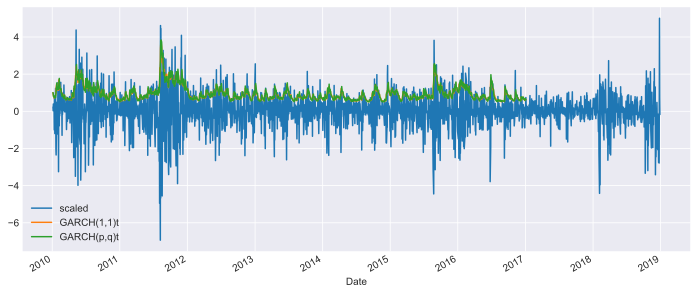

In [83]:
# store the conditional volatility 

df2['GARCH(p,q)t'] = res_garchpq.conditional_volatility

fig, axes = plt.subplots(figsize = (12,5))

cols = ['scaled', 'GARCH(1,1)t', 'GARCH(p,q)t']

df2[cols].plot(ax = axes)

axes.grid()

In [84]:
fcast_garchpq = res_garchpq.forecast(horizon = N_test, reindex = True, start = '2011-08-09')

In [85]:
# store the forecasts from the date we set onwards 

df2.loc['2011-08-10':'2013-08-06', 'GARCH(p,q)tFcast'] = np.sqrt(fcast_garchpq.variance.loc['2011-08-09'].to_numpy())

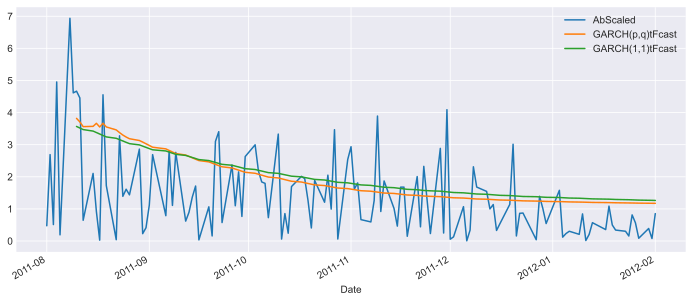

In [86]:
cols = ['AbScaled', 'GARCH(p,q)tFcast', 'GARCH(1,1)tFcast']

fig, axes = plt.subplots(figsize = (12,5))

df2.loc['2011-08-01':'2012-02-01'][cols].plot(ax = axes)

axes.grid()

We have not plotted the test forecasts yet, all we plot so far was training predictions(e.g conditional volatility)

In [87]:
train_idx = df2.index <= train.index[-1]
test_idx = ~train_idx

In [93]:
# train and test predictions for the last GARCH(p,q) model 

df2.loc[train_idx, 'GARCH(p,q)t_train'] = res_garchpq.conditional_volatility
df2.loc[test_idx, 'GARCH(p,q)t_test'] = np.sqrt(fcast_garchpq.variance.iloc[-1].to_numpy()) # last row of the forecast is the last val in the training set  

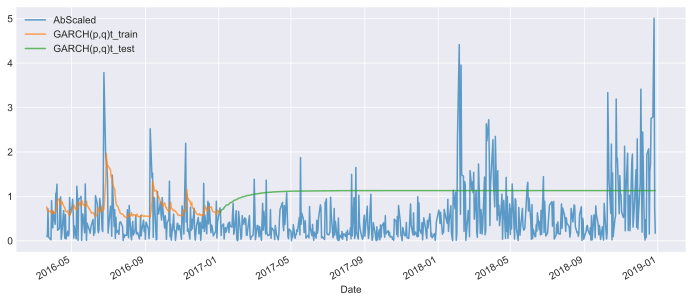

In [94]:
cols = ['AbScaled', 'GARCH(p,q)t_train', 'GARCH(p,q)t_test']

fig, axes = plt.subplots(figsize = (12,5))

df2.iloc[-(N_test + 200):][cols].plot(ax = axes, alpha = 0.7)

axes.grid()

As expected, forecast of the variance simply converges to the unconditional value. The actual long term variance, of course, does not follow this pattern.The prediction seems to be somewhere in the middle below the highest values but above the lowest ones. We do not expect any model to predict random volatility fluctuations several years ahead.  